# First-Order CFA for ETS Scale

A first-order CFA should be used if we are hypothesizing that the observed items (items on the scale) are directly influenced by the latent factors (the psychological constructs we are trying to measure). This would impose a direct, one-step relationship, as opposed to a hierarchical one in the bi-factor solution. 

In [1]:
import pandas as pd
from semopy import Model, Optimizer, calc_stats, inspector, report, semplot

import scaledev
from scaledev import preprocessor

In [2]:
scaledev.set_pd_display()
data_loc = scaledev.get_data_dir()

# load raw CFA data
df_cfa_raw = pd.read_excel(data_loc / "cfa.xlsx")
df_cfa_raw.head()

# Load the EFA data too, so we have it for comparison
df_efa_raw = pd.read_excel(data_loc / "cleaned_ets.xlsx")

In [3]:
# Start data cleaning
df_cfa = df_cfa_raw.copy()

# Clean up the column names
df_cfa = preprocessor.clean_columns(df_cfa)

# scale items - to use later for filtering down the dataframe
scale_items = [
    c for c in df_cfa.columns if c not in ["frequency", "age", "gender", "ethnicity"]
]

df_cfa = preprocessor.scale_totals(df_cfa, scale_items)

# CFA
CFA requires specifying the model structure upfront, and then seeing if the data fits this specification. It falls under the umbrella of Structural Equation Modeling (SEM). 

In the specification below you will see the note about making the factors uncorrelated. This has to do with this being a bifactor model for CFA. We can talk more about this choice when we meet. 

In [4]:
df_model = df_cfa[scale_items]

model_spec = """
    # Latent variables (factors)
    inclusion =~ inclusion1 + inclusion2 + inclusion3 + inclusion4 + inclusion5
    presence =~ presence1 + presence2 + presence3 + presence4 + presence5 + presence6
    embod =~ embod1 + embod2 + embod3 + embod4 + embod5
    wonder =~ wonder1 + wonder2 + wonder3 + wonder4

    # Factor correlations (allow them to correlate since we used oblique rotations)
    inclusion ~~ presence
    inclusion ~~ embod
    inclusion ~~ wonder
    presence ~~ embod
    presence ~~ wonder
    embod ~~ wonder
"""


model = Model(model_spec)
model.fit(df_model, solver="L-BFGS-B")

SolverResult(fun=np.float64(1.2628348317901033), success=True, n_it=70, x=array([1.05778648, 1.04443753, 0.96152492, 1.03420036, 0.93355736,
       1.09969823, 0.98417442, 0.83494477, 0.94545779, 1.48701092,
       1.39344562, 1.38369114, 1.17950117, 0.95746836, 1.05409024,
       1.11266297, 0.61253945, 0.47874579, 0.66099422, 0.83631369,
       0.63250329, 0.70419926, 1.01462344, 0.6058302 , 0.6579237 ,
       1.27839764, 0.65445389, 0.66128313, 0.64257298, 1.54959507,
       0.53770818, 0.55828666, 0.56431938, 0.62697373, 0.47941297,
       0.55094199, 0.73747877, 0.44123426, 0.71991317, 0.92387648,
       0.69063971, 0.77007397, 0.63950881, 0.94141002, 0.5931195 ,
       1.0297889 ]), message='CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH', name_method='L-BFGS-B', name_obj='MLW')

In [5]:
# Calculate fit statistics
fit_stats = calc_stats(model)

# Display the fit statistics
fit_stats

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,164,190,452.09487,0.00000,4471.70860,0.93271,0.89890,0.88287,0.89890,0.92205,0.07015,89.47433,267.97885,1.26283


In [6]:
opt = Optimizer(model)
objective_function_value = opt.optimize()

model_values = inspector.inspect(opt, std_est=True)
model_values

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,inclusion1,~,inclusion,1.00000,0.78017,-,-,-
1,inclusion2,~,inclusion,1.05779,0.79141,0.06714,15.75406,0.00000
2,inclusion3,~,inclusion,1.04444,0.78602,0.06684,15.62660,0.00000
3,inclusion4,~,inclusion,0.96152,0.74311,0.06577,14.61967,0.00000
4,inclusion5,~,inclusion,1.03420,0.80688,0.06415,16.12053,0.00000
5,presence1,~,presence,1.00000,0.80504,-,-,-
6,presence2,~,presence,0.93356,0.73842,0.06142,15.19978,0.00000
7,presence3,~,presence,1.09970,0.85762,0.05938,18.52096,0.00000
8,presence4,~,presence,0.98417,0.75973,0.06241,15.76872,0.00000
9,presence5,~,presence,0.83494,0.65850,0.06338,13.17410,0.00000


# Item loadings

Lines 0-19 show how strongly each item loads onto its respective factor. The Est. Std column can be interpreted similarly to a regression coefficient or correlation. Generally, values of 0.7 or above are considered excellent, 0.6 is good, 0.5 is moderately good, and below 0.5 can be considered weak.

## Inclusion
Standardized loadings are between 0.74 and 0.81 - these look good. 

## Presence
Standardized loadings are between 0.66 and 0.86. These are pretty good. Presence 5 is a bit lower, but still acceptable. 

## Embodiment
Standardized loadings are between 0.61 and 0.83. Again in an acceptable to good range. 1 and 5 are a bit low, but likely acceptable. 

## Wonder
Standardized loadings are between 0.65 and 0.77. Not quite as high as on the other factors, but still in the acceptable to good range. Wonder 2 is the lowest. 

All p values are less than 0.05, so relationships between each item and its assigned latent factor are significant. 

# Factor correlations - rows 20-29
Several of the correlations are high, in particular with wonder. But they are acceptable.  


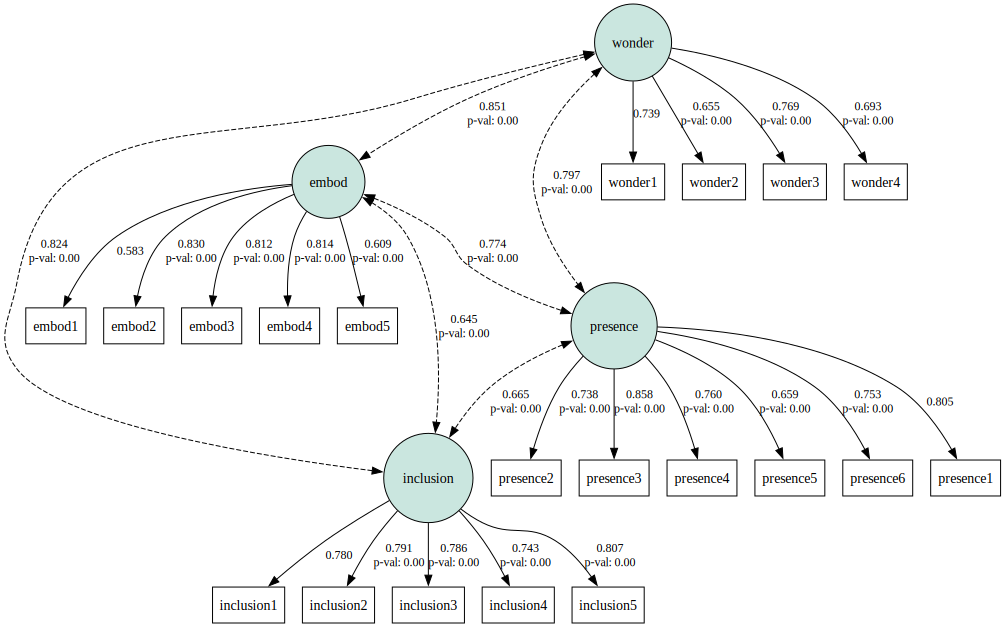

In [7]:
# path diagram
semplot(
    mod=model,
    plot_covs=True,
    std_ests=True,
    filename="plots/cfa_model_plot_first_order.png",
)

In [8]:
# Save out an html report for the CFA
report(model=model, name="ETS Scale First Order", std_est=True)